# Project Title: MNIST Handwritten Digit Classification

This project aims to develop a robust and accurate classification system that can effectively identify and categorize handwritten digits. Handwriting recognition is a critical component in various applications, such as optical character recognition (OCR), digitized document analysis, and automated data entry. The MNIST dataset, consisting of a vast collection of handwritten digits, serves as an ideal foundation for training and testing our classification model.

### Import Libraries and Packages

In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

### Load Dataset

In [11]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [12]:
print("Length of train dataset: " + str(len(x_train)) + "\nLength of test dataset: "  + str(len(x_test)))

Length of train dataset: 60000
Length of test dataset: 10000


In order of apperance, the first 5 elements are : 5, 0, 4, 1, 9


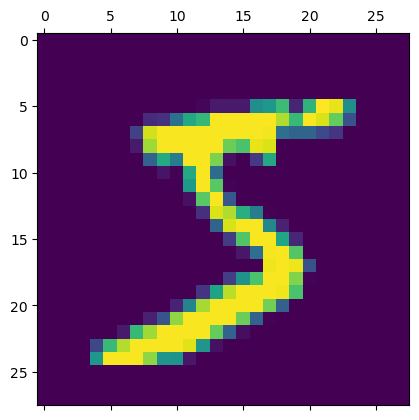

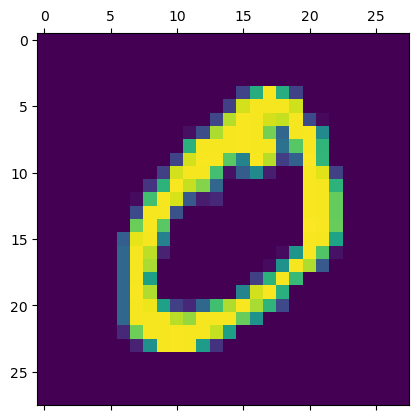

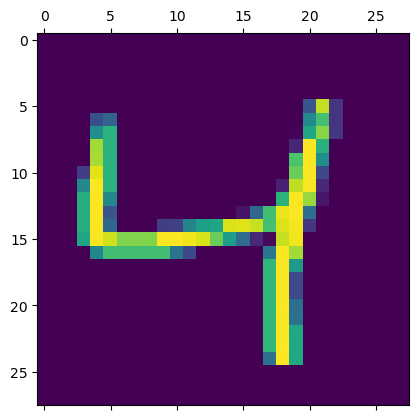

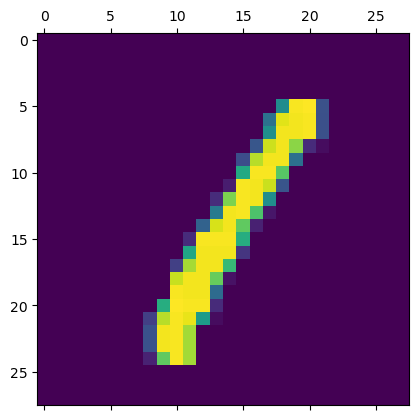

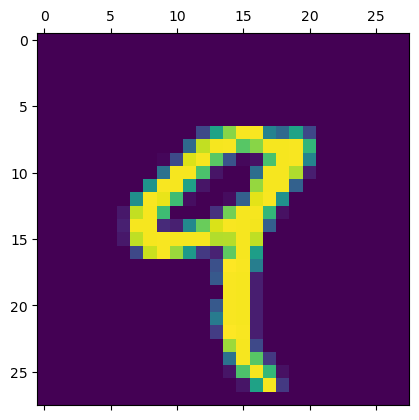

In [13]:
plt.matshow(x_train[0])
plt.matshow(x_train[1])
plt.matshow(x_train[2])
plt.matshow(x_train[3])
plt.matshow(x_train[4])
print ("In order of apperance, the first 5 elements are : " + str(y_train[0]) + ", " + str(y_train[1]) + ", " + 
       str(y_train[2]) + ", " + str(y_train[3]) + ", " + str(y_train[4]))

### Preprocessing

In [14]:
x_train_f = x_train.reshape(len(x_train), 28 * 28) / 255
x_test_f = x_test.reshape(len(x_test), 28 * 28) / 255

In [15]:
x_train_f.shape
x_test_f.shape

(10000, 784)

### Model Building (Artificial Neural Network- ANN)

In [22]:
ann = keras.Sequential([
    keras.layers.Dense(10, # no. of neurons on output layer
                       input_shape=(784,), # no. of neurons on input layer
                       activation="sigmoid" # activation function
                      )])
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
ann.compile (optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [26]:
hist = ann.fit(
    x_train_f, # input values
    y_train, # output values
    epochs=7 # number of iterations
)

Epoch 1/7
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4738 - accuracy: 0.8754
Epoch 2/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3041 - accuracy: 0.9151
Epoch 3/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2833 - accuracy: 0.9201
Epoch 4/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2734 - accuracy: 0.9234
Epoch 5/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2667 - accuracy: 0.9252
Epoch 6/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2623 - accuracy: 0.9264
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9276


### Model Evaluation

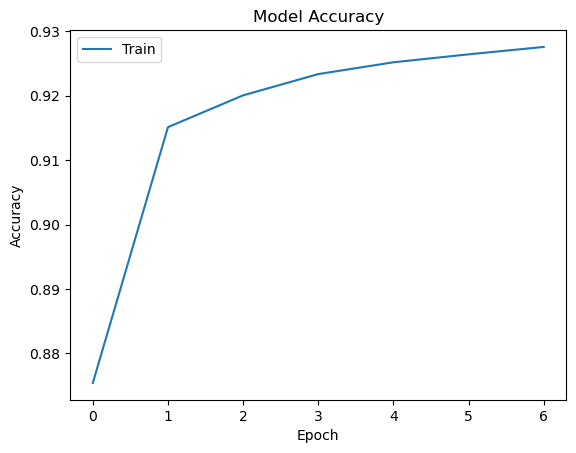

In [28]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

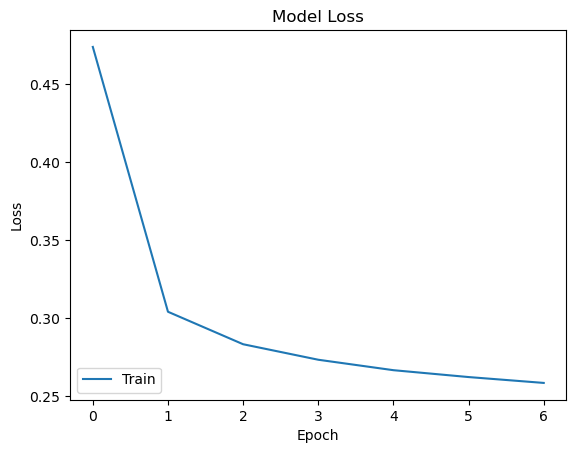

In [29]:
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower left')
plt.show()

In [30]:
ann.evaluate(
    x_test_f, # input values
    y_test, # output values
)

313/313 [==============================] - 1s 2ms/step - loss: 0.2713 - accuracy: 0.9244


[0.27131524682044983, 0.9243999719619751]

In [33]:
predictions = ann.predict(x_test_f)
predictions_labels = [np.argmax(prediction) for prediction in predictions]
predictions_labels[:26]

313/313 [==============================] - 1s 2ms/step


[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0]

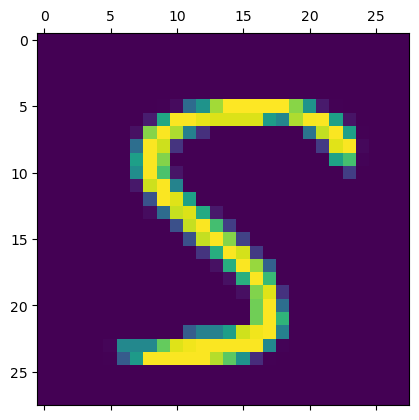

In [34]:
sample = 333
plt.matshow(x_test[sample])

#### Confusion Matrix

In [35]:
confusion_matrix = tf.math.confusion_matrix(
    labels=y_test, # truth predictions
    predictions=predictions_labels # model predictions
)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1108,    3,    3,    0,    1,    3,    2,   15,    0],
       [   9,    9,  902,   32,   11,    4,   12,    8,   42,    3],
       [   3,    0,   12,  936,    1,   22,    2,    9,   19,    6],
       [   2,    1,    2,    2,  916,    0,   11,    3,   10,   35],
       [  10,    1,    1,   39,   10,  785,   11,    5,   27,    3],
       [  14,    3,    4,    3,    7,   14,  909,    2,    2,    0],
       [   2,    6,   17,   13,    9,    1,    0,  946,    4,   30],
       [   8,    6,    7,   31,    9,   31,    8,    9,  858,    7],
       [  11,    7,    1,   13,   27,    8,    0,   19,    5,  918]])>

<AxesSubplot:>

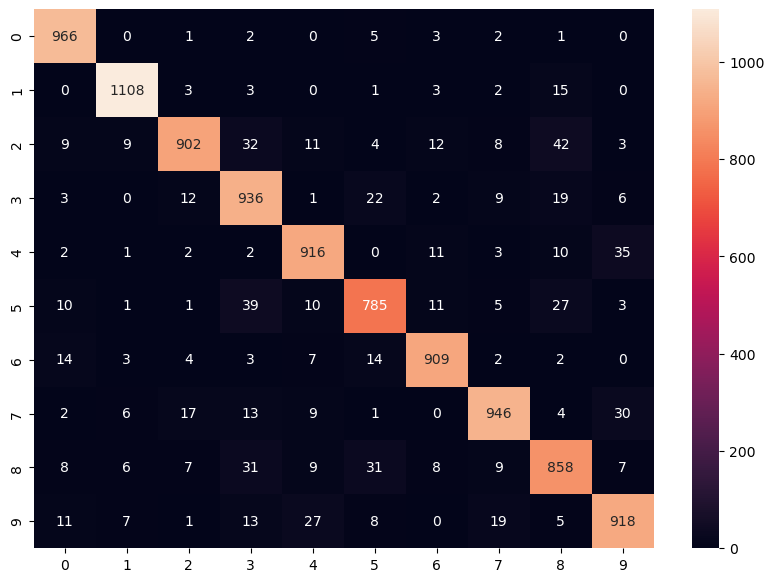

In [36]:
plt.figure(figsize = (10,7))
plt.xlabel('Predicted Value')
plt.ylabel('Truth Value')
sb.heatmap (confusion_matrix, annot=True, fmt='d')

### Conclusion

Overall, the ANN model achieved good accuracy and appears to be effective in classifying handwritten digits. The distribution of correct and incorrect classifications in the confusion matrix provides valuable insights. Further analysis, such as examining specific misclassifications, can offer insights into areas where the model may need improvement. Additionally, consideration of hyperparameter tuning and experimentation with different neural network architectures can potentially enhance the model's performance further.